<a href="https://colab.research.google.com/github/AnkitRaj30/iris_flower_classification/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>    Assignment Task 1 - IRIS FLOWER CLASSIFICATION</center></h1>
 
*(By Ankit Rajvaidya)*

### Task Aim : - In this task we have to Predict the Species of Iris flower based on the length and width of its Sepals and Petals.

 #  **Steps :-**

1 - Load the data

2 - Data Analysis (EDA)

3 - Data Visualization

4 - Model Training and Evaluation

5 - Making predictions.

# **1.** **Loading The Data**
   *  Importing Required Libraries
   *  Import Data from system workspace

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
Iris = pd.read_csv("/content/Iris.csv")
print("Data Imported Successfully")
print("First Five Rows : \n",Iris.head())
print("Last Five Rows : \n",Iris.tail())

Data Imported Successfully
First Five Rows : 
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Last Five Rows : 
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Ir

# **2.** **Data Analysis  (EDA)**

In [3]:
#we check iris shape with rows and column count
rows,col = Iris.shape
print("Iries_shape : " ,Iris.shape)
print("Row : %s ,column : %s" %(rows , col))

Iries_shape :  (150, 6)
Row : 150 ,column : 6


In [4]:
#description of the data in the DataFrame
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#we check summary of a dataframe
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# we check the unique value in the dataframe
Iris.count().unique

<bound method Series.unique of Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64>

In [7]:
#we check null value in the dataframe
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#we check duplication in the dataframe
Iris.duplicated().sum()

0

In [9]:
#we check containing counts of unique values in species column of the dataframe
Iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
# we don't need Id column
iris = Iris.drop(columns=["Id"])

In [11]:
# we check Correlation between attributes
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# **3. Data Visualization** 


*   Use Boxplot
*   Use Pairplot
*   Conclusion After Visualization



Boxplots : -


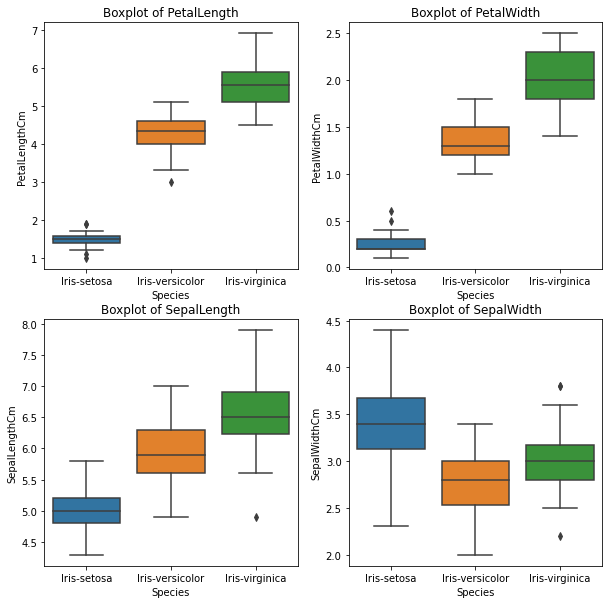

In [12]:
print("Boxplots : -")
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Box plot of Petal Length
sns.boxplot(ax=ax[0,0], x="Species",y="PetalLengthCm",data=iris);
ax[0,0].set_title("Boxplot of PetalLength")

# Box plot of Petal Width
sns.boxplot(ax=ax[0,1], x="Species",y="PetalWidthCm",data=iris);
ax[0,1].set_title("Boxplot of PetalWidth")

# Box Plot of Sepal Leangth
sns.boxplot(ax=ax[1,0], x="Species",y="SepalLengthCm",data=iris);
ax[1,0].set_title("Boxplot of SepalLength")

# box plot of Sepal Width
sns.boxplot(ax=ax[1,1], x="Species",y="SepalWidthCm",data=iris);
ax[1,1].set_title("Boxplot of SepalWidth");

pairplot :- 


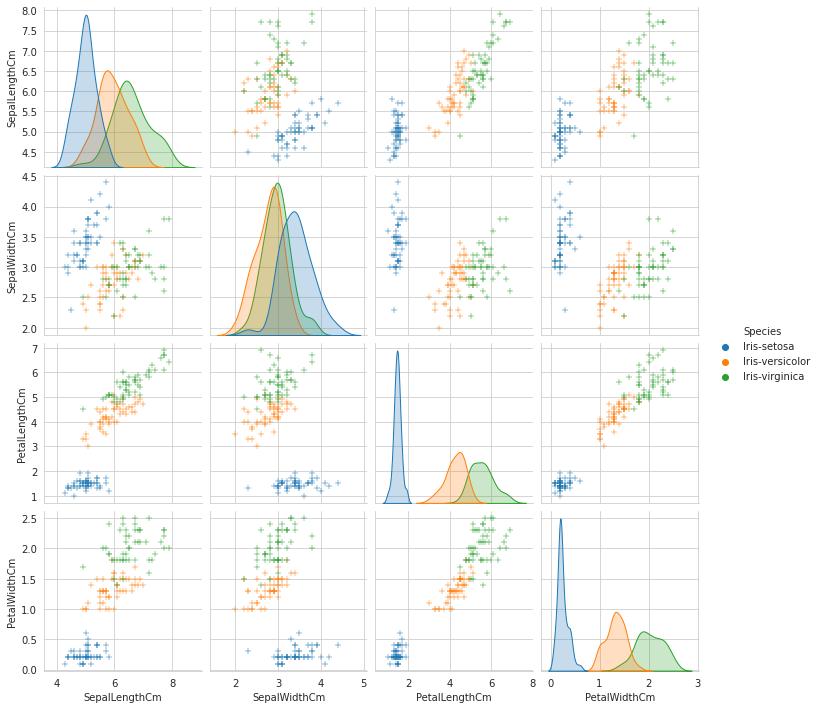

In [13]:
# Visualize the whole dataset
print("pairplot :- ")
sns.set_style('whitegrid')
sns.pairplot(iris, hue='Species',markers ="+")
plt.show()

* <h2>Conclusion After Visualization :- </h2> 

1.   From this visualization, we can tell that iris-setosa is well separated from the other two flowers
2.   iris virginica is the longest flower and iris setosa is the shortest.

# **4.**  ****Model Training and Evaluation****


*   Model Selection
*   Confusion Matrix Report
*   Classification Report





In [14]:
# Separate features and target
X = iris.drop(columns = "Species")
y = iris["Species"]

print("Features of data : \n" , X.head())
print("\n Target Of Data : \n", y.head())

Features of data : 
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

 Target Of Data : 
 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


* The next step is to split the data into training and test sets. Scikit-learn contains a function that shuffles the dataset and splits it into two. The function is known as the train_test_split function:

In [15]:
# Split data for Training(80%) and Testing(20%)
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size = 0.2)

In [16]:
print("we check the length of train data and test data: ")
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

print("\nShape of splited data :")
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',y_train.shape)
print('test_labels',y_test.shape)

we check the length of train data and test data: 
120
30
120
30

Shape of splited data :
X_train (120, 4)
X_test (30, 4)
train_labels (120,)
test_labels (30,)


* Now we can start building the actual machine learning model, namely the Decision Tree Classifier.


* **Decision Tree Classifier** 



In [17]:
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size = 0.2)

In [18]:
model = DecisionTreeClassifier()

* To build the model on the training set

In [19]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
model.score(X_train, y_train)

1.0

In [21]:
y_pred = model.predict(X_test)

* found out the determention of the accuracy
  * accuracy_score() takes true values and predicted values and returns the percentage of accuracy.

In [22]:
print("Accuracy score: ",accuracy_score(y_test, y_pred))

Accuracy score:  0.9666666666666667



* **Confusion Matrix** 
     * we check the performance of a classification algorithm by using confusion Matrix


In [23]:
con_matrix = confusion_matrix(y_test,y_pred)
print("Confussion_Matrix")
print(con_matrix)

Confussion_Matrix
[[15  0  0]
 [ 0  6  0]
 [ 0  1  8]]


Heat map of confusion matrix :- 


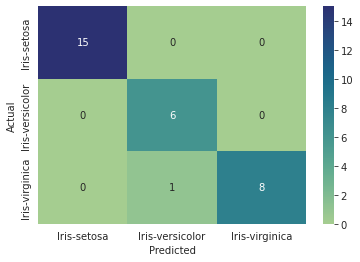

In [24]:
print("Heat map of confusion matrix :- ")
cm = pd.DataFrame(con_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name= 'Predicted'
sns.heatmap(cm, cmap = "crest", annot=True) ;


* **Classification Report** 
 *  Now let’s see the detailed classification report based on the test dataset.
   * The classification report gives a detailed report of the prediction.
   * Precision :- defines the ratio of true positives to the sum of true positive and false positives.
   * Recall :-  defines the ratio of true positive to the sum of true positive and false negative.
   * F1-score :- is the mean of precision and recall value.
   * Support :- is the number of actual occurrences of the class in the specified dataset.




In [25]:
report = classification_report(y_test,y_pred)
print("classification_report : ")
print(report)

classification_report : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.95      0.96      0.95        30
   weighted avg       0.97      0.97      0.97        30



# **5. Making Predictions**


*   Model Test with own values to get predicted flower




In [26]:
#checking with our new input
new_data = np.array([[2.5,3.0,5.9,5.8]])
pred = model.predict(new_data)
print("The input_data is predicated flower as a : ", pred, "\n")

The input_data is predicated flower as a :  ['Iris-virginica'] 



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [27]:
#checking with our new input
new_data = np.array([[1.5,4.8,2.8,2.2]])
pred = model.predict(new_data)
print("The input_data is predicated flower as a : ",pred , "\n")

The input_data is predicated flower as a :  ['Iris-versicolor'] 



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [28]:
#checking with our new input
new_data = np.array([[1.5,6.5,1.8,0.5]])
pred = model.predict(new_data)
print("The input_data is predicated flower as a : ",pred , "\n")

The input_data is predicated flower as a :  ['Iris-setosa'] 



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Decision Tree Model Conclusion :-** It looks like the model is predicting correctly because the setosa is shortest and virginica is the longest and versicolor is in between these two

* ****The Iris Classification Model is ready!!****